考虑一个通信网络设计问题：需要连接5个城市（A、B、C、D、E），各城市间的连接成本如下：
A-B:2
A-C:3
B-C:1
B-D:1
C-D:4
C-E:5
D-E:6

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from collections import defaultdict

In [24]:
# 创建示例图
def create_example_graph():
    G = nx.Graph()
    
    # 添加带权重的边
    edges = [
        ('A', 'B', 2),
        ('A', 'C', 3),
        ('B', 'C', 1),
        ('B', 'D', 1),
        ('C', 'D', 4),
        ('C', 'E', 5),
        ('D', 'E', 6)
    ]
    
    G.add_weighted_edges_from(edges)
    return G

In [25]:
# 可视化图
def visualize_graph(G, title="图结构", mst_edges=None, highlight_nodes=None):
    plt.figure(figsize=(10, 7))
    
    # 设置节点位置
    pos = nx.spring_layout(G, seed=42)
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    
    # 绘制所有边（灰色）
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.5, alpha=0.5, edge_color='gray')
    
    # 如果提供了MST边，高亮显示
    if mst_edges:
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges, width=3, edge_color='red')
    
    # 如果提供了要高亮的节点
    if highlight_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_size=700, node_color='red')
    
    # 添加标签
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')
    
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()



In [26]:
def kruskal_mst(G):
    """
    Kruskal算法实现最小生成树
    
    参数:
        G: networkx图对象，带权重的无向图
        
    返回:
        mst_edges: 最小生成树的边列表
        total_weight: 最小生成树的总权重
    """
    # 1. 将所有边按权重排序
    sorted_edges = sorted(G.edges(data=True), key=lambda e: e[2]['weight'])
    
    # 2. 初始化并查集（每个节点初始时是自己的父节点）
    parent = {node: node for node in G.nodes}
    rank = {node: 0 for node in G.nodes}
    
    # 并查集的查找操作（带路径压缩）
    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])  # 路径压缩
        return parent[node]
    
    # 并查集的合并操作（按秩合并）
    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        
        if root1 == root2:
            return False  # 会形成环，不能合并
        
        # 按秩合并
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        elif rank[root1] < rank[root2]:
            parent[root1] = root2
        else:
            parent[root2] = root1
            rank[root1] += 1
        return True
    
    # 3. Kruskal算法主循环
    mst_edges = []
    total_weight = 0
    
    # 创建一个DataFrame来存储执行过程
    execution_steps = []
    
    print("Kruskal算法执行过程:")
    print("-" * 60)
    print(f"{'步骤':<5} | {'处理边':<8} | {'权重':<6} | {'是否加入':<10} | {'当前MST边':<20} | {'总权重'}")
    print("-" * 60)
    
    step = 1
    for u, v, data in sorted_edges:
        weight = data['weight']
        
        # 检查是否形成环
        if union(u, v):
            mst_edges.append((u, v))
            total_weight += weight
            
            # 记录当前步骤
            current_edges = ", ".join([f"{e[0]}-{e[1]}" for e in mst_edges])
            execution_steps.append({
                '步骤': step,
                '处理边': f"{u}-{v}",
                '权重': weight,
                '是否加入': '是',
                '当前MST边': current_edges,
                '总权重': total_weight
            })
            
            # 打印当前步骤
            print(f"{step:<5} | {u}-{v:<6} | {weight:<6} | {'是':<10} | {current_edges:<20} | {total_weight}")
            step += 1
        else:
            # 记录当前步骤
            current_edges = ", ".join([f"{e[0]}-{e[1]}" for e in mst_edges])
            execution_steps.append({
                '步骤': step,
                '处理边': f"{u}-{v}",
                '权重': weight,
                '是否加入': '否（形成环）',
                '当前MST边': current_edges,
                '总权重': total_weight
            })
            
            # 打印当前步骤
            print(f"{step:<5} | {u}-{v:<6} | {weight:<6} | {'否（形成环）':<10} | {current_edges:<20} | {total_weight}")
            step += 1
    
    print("-" * 60)
    
    # 用DataFrame显示执行过程（更清晰）
    df_steps = pd.DataFrame(execution_steps)
    display(df_steps)
    
    return mst_edges, total_weight

Kruskal算法测试


/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f

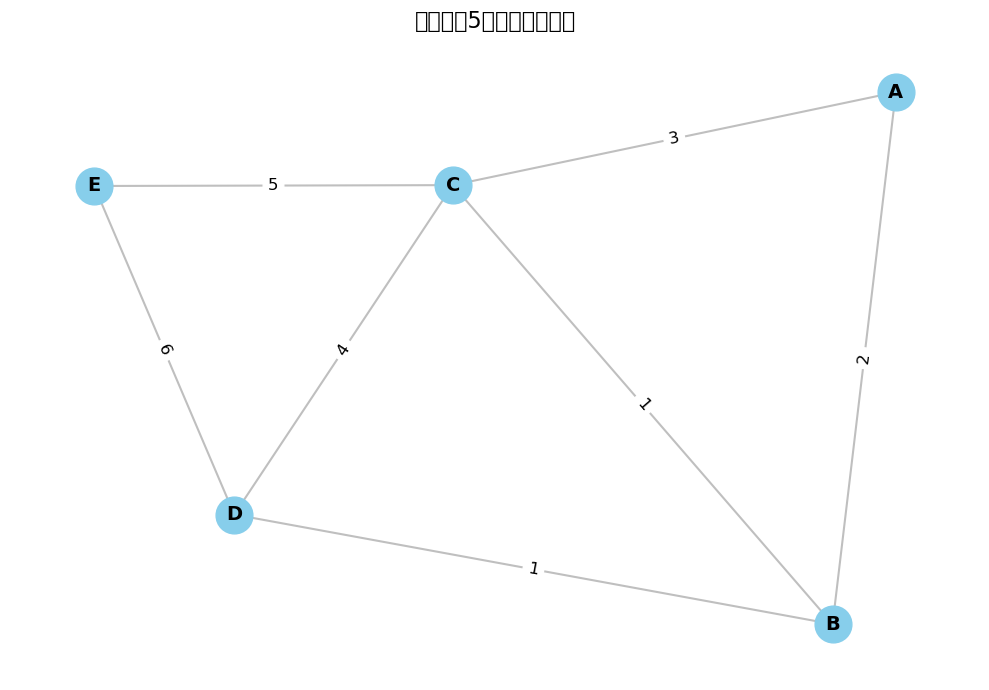

Kruskal算法执行过程:
------------------------------------------------------------
步骤    | 处理边      | 权重     | 是否加入       | 当前MST边               | 总权重
------------------------------------------------------------
1     | B-C      | 1      | 是          | B-C                  | 1
2     | B-D      | 1      | 是          | B-C, B-D             | 2
3     | A-B      | 2      | 是          | B-C, B-D, A-B        | 4
4     | A-C      | 3      | 否（形成环）     | B-C, B-D, A-B        | 4
5     | C-D      | 4      | 否（形成环）     | B-C, B-D, A-B        | 4
6     | C-E      | 5      | 是          | B-C, B-D, A-B, C-E   | 9
7     | D-E      | 6      | 否（形成环）     | B-C, B-D, A-B, C-E   | 9
------------------------------------------------------------


,步骤,处理边,权重,是否加入,当前MST边,总权重
0,1,B-C,1,是,B-C,1
1,2,B-D,1,是,"B-C, B-D",2
2,3,A-B,2,是,"B-C, B-D, A-B",4
3,4,A-C,3,否（形成环）,"B-C, B-D, A-B",4
4,5,C-D,4,否（形成环）,"B-C, B-D, A-B",4
5,6,C-E,5,是,"B-C, B-D, A-B, C-E",9
6,7,D-E,6,否（形成环）,"B-C, B-D, A-B, C-E",9


/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_41096/4028844458.py:29: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz

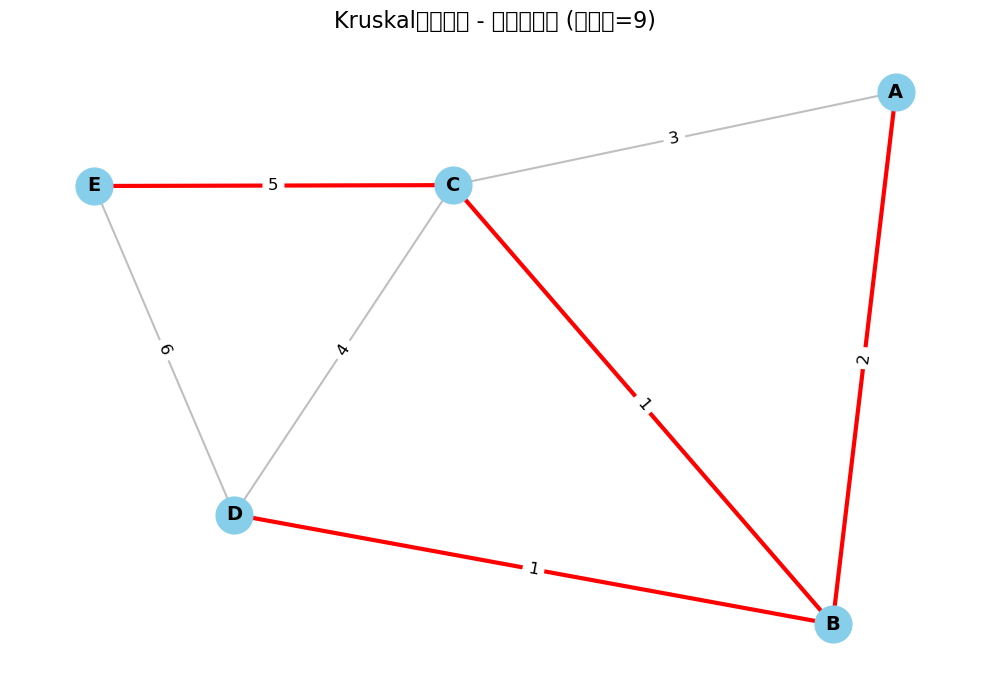


最小生成树包含的边: [('B', 'C'), ('B', 'D'), ('A', 'B'), ('C', 'E')]
最小生成树总权重: 9



In [27]:
# 测试Kruskal算法
def test_kruskal():
    print("=" * 80)
    print("Kruskal算法测试")
    print("=" * 80)
    
    # 创建示例图
    G = create_example_graph()
    
    # 可视化原始图
    visualize_graph(G, "原始图：5个城市通信网络")
    
    # 执行Kruskal算法
    mst_edges, total_weight = kruskal_mst(G)
    
    # 可视化最小生成树
    visualize_graph(G, f"Kruskal算法结果 - 最小生成树 (总权重={total_weight})", mst_edges)
    
    # 显示结果
    print(f"\n最小生成树包含的边: {mst_edges}")
    print(f"最小生成树总权重: {total_weight}")
    print(f"{'=' * 80}\n")

test_kruskal()

In [ ]:
# Prim算法实现
def prim_mst(G, start_node='A'):
    """
    Prim算法实现最小生成树
    
    参数:
        G: networkx图对象，带权重的无向图
        start_node: 起始节点，默认为'A'
        
    返回:
        mst_edges: 最小生成树的边列表
        total_weight: 最小生成树的总权重
    """
    # 初始化
    mst_set = set()  # 已加入MST的顶点集合
    key = {node: float('inf') for node in G.nodes}  # 到MST的最小距离
    parent = {node: None for node in G.nodes}  # MST中的父节点
    
    # 从start_node开始
    key[start_node] = 0
    mst_edges = []
    total_weight = 0
    
    print("\nPrim算法执行过程:")
    print("-" * 80)
    print(f"{'步骤':<5} | {'当前顶点':<8} | {'加入边':<10} | {'权重':<6} | {'key值更新':<30} | {'MST边':<25} | {'总权重'}")
    print("-" * 80)
    
    step = 1
    for _ in range(len(G.nodes)):
        # 1. 选择key值最小且不在MST中的顶点
        min_key = float('inf')
        u = None
        for node in G.nodes:
            if node not in mst_set and key[node] < min_key:
                min_key = key[node]
                u = node
        
        # 将u加入MST
        mst_set.add(u)
        
        # 记录加入的边（除了起始节点）
        if parent[u] is not None:
            mst_edges.append((parent[u], u))
            total_weight += G[parent[u]][u]['weight']
            added_edge = f"{parent[u]}-{u}"
            weight_val = G[parent[u]][u]['weight']
        else:
            added_edge = "-"
            weight_val = "-"
        
        # 2. 更新u的邻居的key值
        key_updates = []
        for v in G.neighbors(u):
            if v not in mst_set and G[u][v]['weight'] < key[v]:
                key[v] = G[u][v]['weight']
                parent[v] = u
                key_updates.append(f"{v}({key[v]})")
        
        # 打印当前步骤
        current_edges = ", ".join([f"{e[0]}-{e[1]}" for e in mst_edges])
        updates_str = ", ".join(key_updates) if key_updates else "-"
        print(f"{step:<5} | {u:<8} | {added_edge:<10} | {weight_val:<6} | {updates_str:<30} | {current_edges:<25} | {total_weight}")
        step += 1
    
    print("-" * 80)
    return mst_edges, total_weight

# 测试Prim算法
def test_prim():
    G = create_example_graph()
    
    # 可视化原始图
    visualize_graph(G, "原始图：5个城市通信网络")
    
    # 执行Prim算法
    mst_edges, total_weight = prim_mst(G)
    
    # 可视化最小生成树
    visualize_graph(G, f"Prim算法结果 - 最小生成树 (总权重={total_weight})", mst_edges)
    
    print(f"\n最小生成树包含的边: {mst_edges}")
    print(f"最小生成树总权重: {total_weight}")

# 运行测试
test_prim()